# Air Quality Forecasting

In [1]:
import numpy as np  
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt  
from datetime import datetime 
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.impute import SimpleImputer 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score , accuracy_score, confusion_matrix

## Reading and exploring the Health care Dataser

In [2]:
df = pd.read_csv('air quality data.csv')

In [3]:
df.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN
1,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN
2,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN
3,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN
4,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN


In [4]:
df.tail()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
29526,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
29527,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
29528,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0
29529,Visakhapatnam,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0
29530,Visakhapatnam,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0


In [5]:
df.isnull().sum().sum()

83807

In [6]:
df.shape

(29531, 14)

In [7]:
df.info

<bound method DataFrame.info of                 City  PM2.5   PM10     NO    NO2    NOx    NH3     CO    SO2  \
0          Ahmedabad    NaN    NaN   0.92  18.22  17.15    NaN   0.92  27.64   
1          Ahmedabad    NaN    NaN   0.97  15.69  16.46    NaN   0.97  24.55   
2          Ahmedabad    NaN    NaN  17.40  19.30  29.70    NaN  17.40  29.07   
3          Ahmedabad    NaN    NaN   1.70  18.48  17.97    NaN   1.70  18.59   
4          Ahmedabad    NaN    NaN  22.10  21.42  37.76    NaN  22.10  39.33   
...              ...    ...    ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  15.02  50.94   7.68  25.06  19.54  12.47   0.47   8.55   
29527  Visakhapatnam  24.38  74.09   3.42  26.06  16.53  11.99   0.52  12.72   
29528  Visakhapatnam  22.91  65.73   3.45  29.53  18.33  10.71   0.48   8.42   
29529  Visakhapatnam  16.64  49.97   4.05  29.26  18.80  10.03   0.52   9.84   
29530  Visakhapatnam  15.00  66.00   0.40  26.85  14.05   5.20   0.59   2.10   

       

In [9]:
df.duplicated().sum()

2297

In [10]:
df1 = df.dropna(subset=['AQI'],inplace=True)

In [13]:
df.isnull().sum().sort_values(ascending=False)

Xylene     15372
PM10        7086
NH3         6536
Toluene     5826
Benzene     3535
NOx         1857
O3           807
PM2.5        678
SO2          605
CO           445
NO2          391
NO           387
City           0
AQI            0
dtype: int64

In [14]:
df.shape

(24850, 14)

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24172.0,67.476613,63.075398,0.04,29.0000,48.785,80.9250,914.94
PM10,17764.0,118.454435,89.487976,0.03,56.7775,96.180,150.1825,917.08
NO,24463.0,17.622421,22.421138,0.03,5.6600,9.910,20.0300,390.68
NO2,24459.0,28.978391,24.627054,0.01,11.9400,22.100,38.2400,362.21
NOx,22993.0,32.289012,30.712855,0.00,13.1100,23.680,40.1700,378.24
NH3,18314.0,23.848366,25.875981,0.01,8.9600,16.310,30.3600,352.89
CO,24405.0,2.345267,7.075208,0.00,0.5900,0.930,1.4800,175.81
SO2,24245.0,14.362933,17.428693,0.01,5.7300,9.220,15.1400,186.08
O3,24043.0,34.912885,21.724525,0.01,19.2500,31.250,46.0800,257.73
Benzene,21315.0,3.458668,16.036020,0.00,0.2300,1.290,3.3400,455.03


In [20]:
null_percentage_value= (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

In [21]:
null_percentage_value

Xylene     61.859155
PM10       28.515091
NH3        26.301811
Toluene    23.444668
Benzene    14.225352
NOx         7.472837
O3          3.247485
PM2.5       2.728370
SO2         2.434608
CO          1.790744
NO2         1.573441
NO          1.557344
City        0.000000
AQI         0.000000
dtype: float64

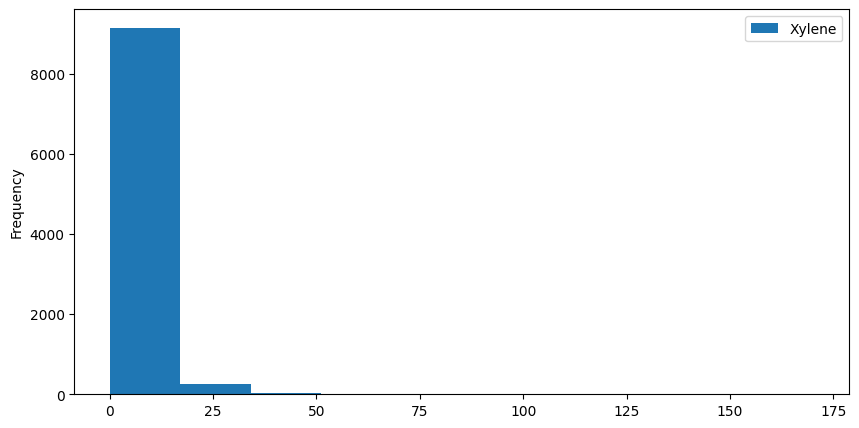

In [22]:
df['Xylene'].plot(kind="hist",figsize=(10,5))
plt.legend()
plt.show()

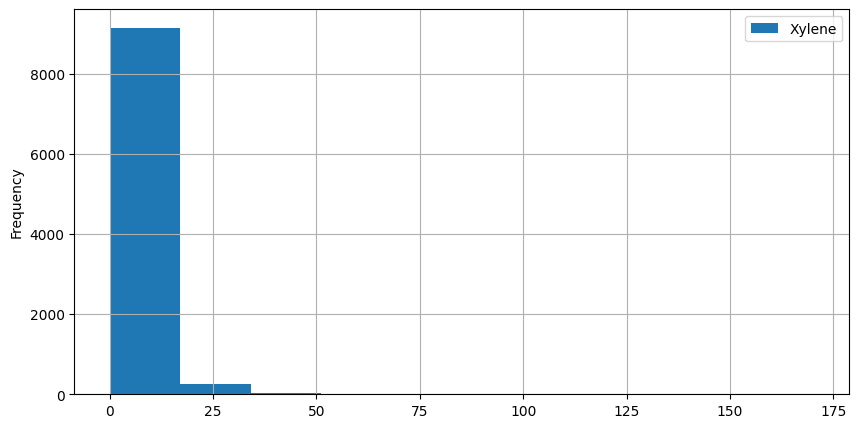

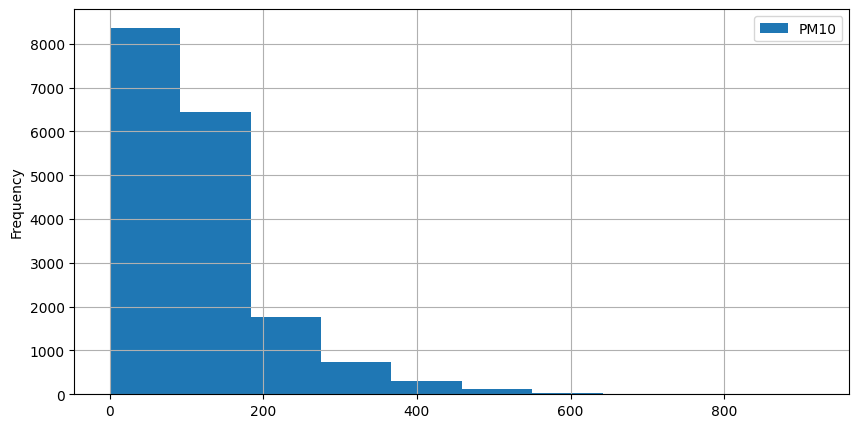

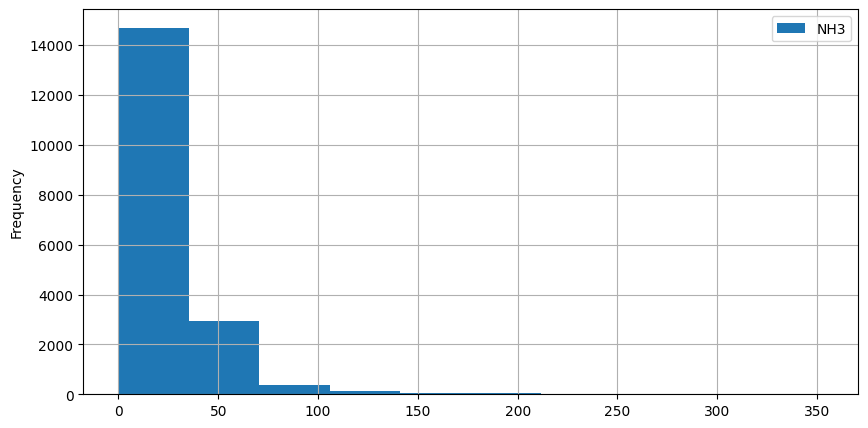

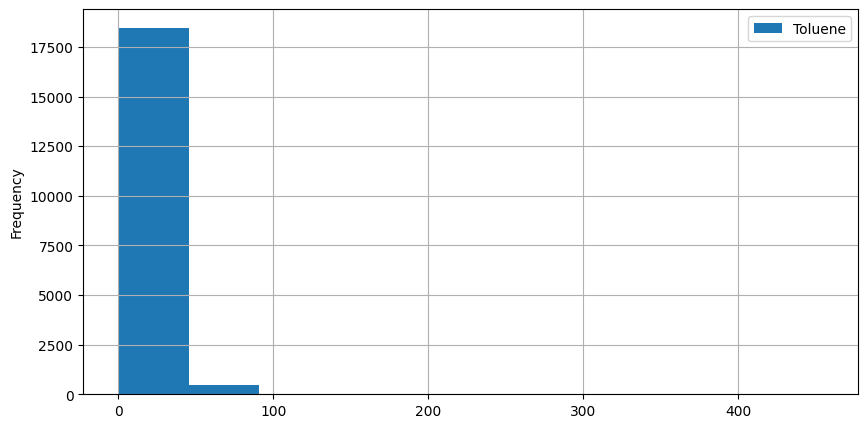

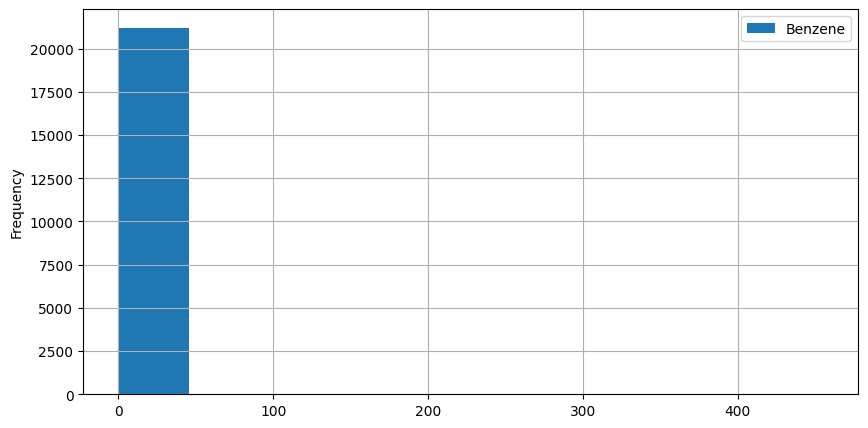

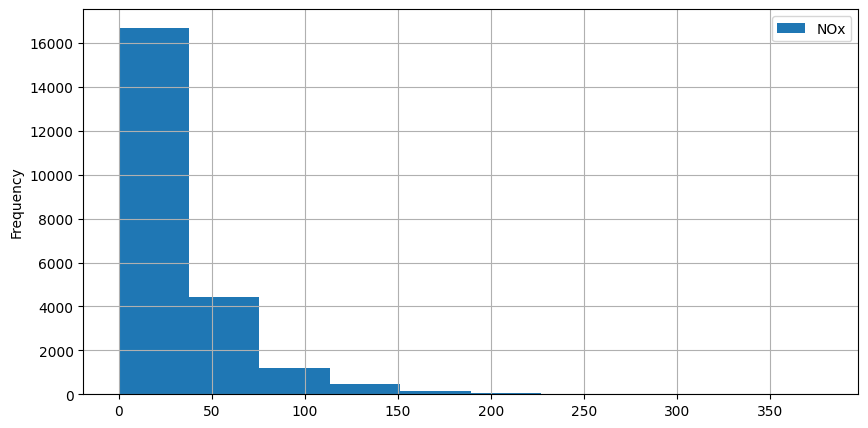

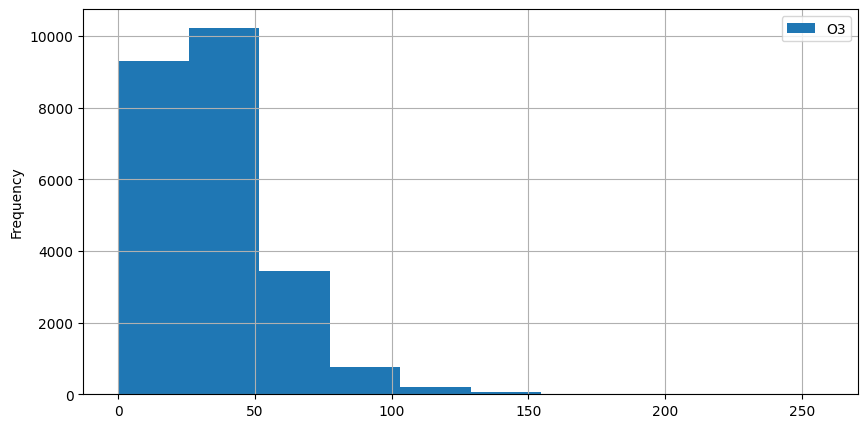

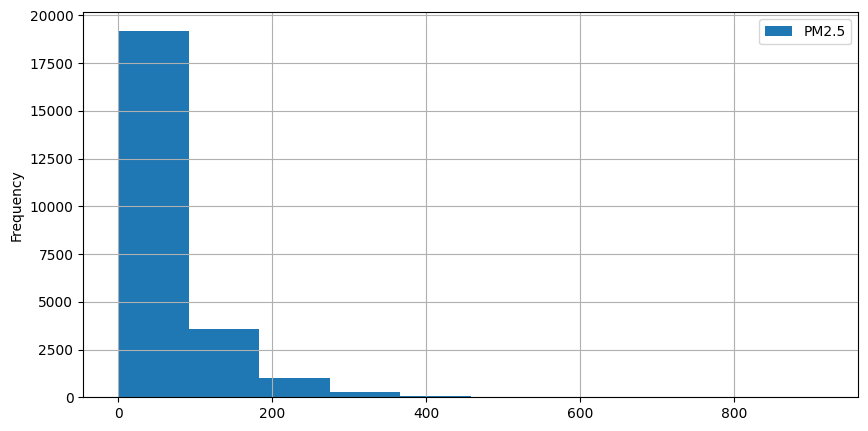

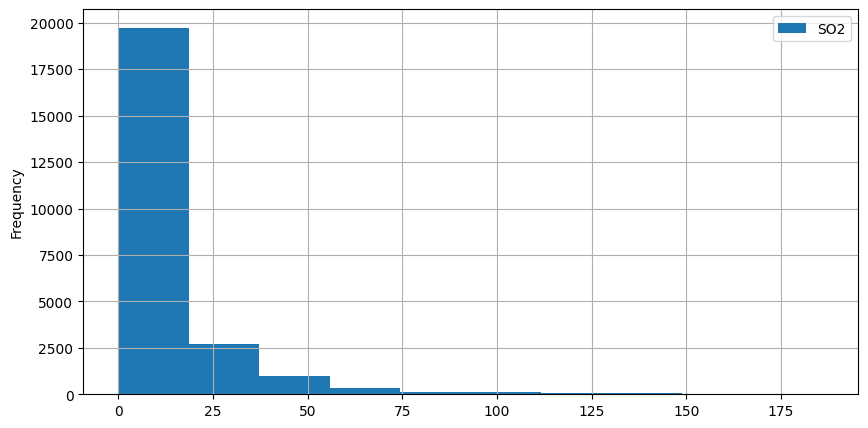

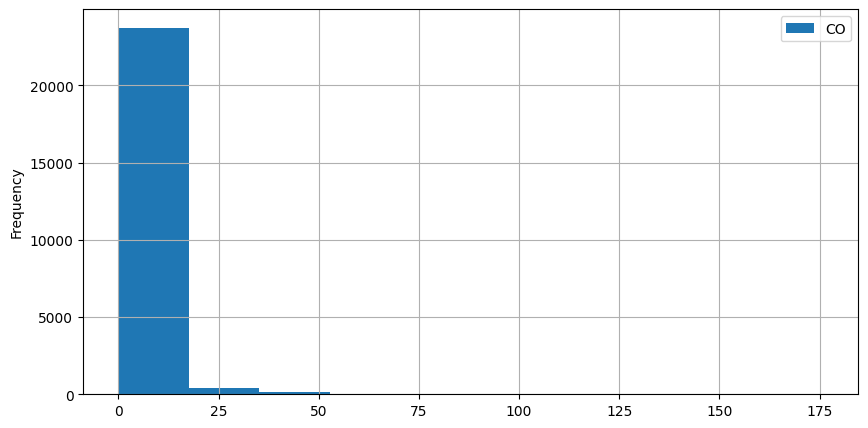

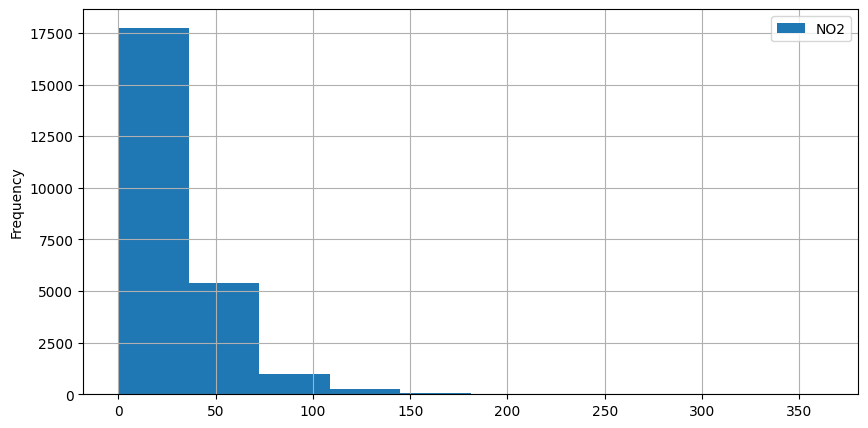

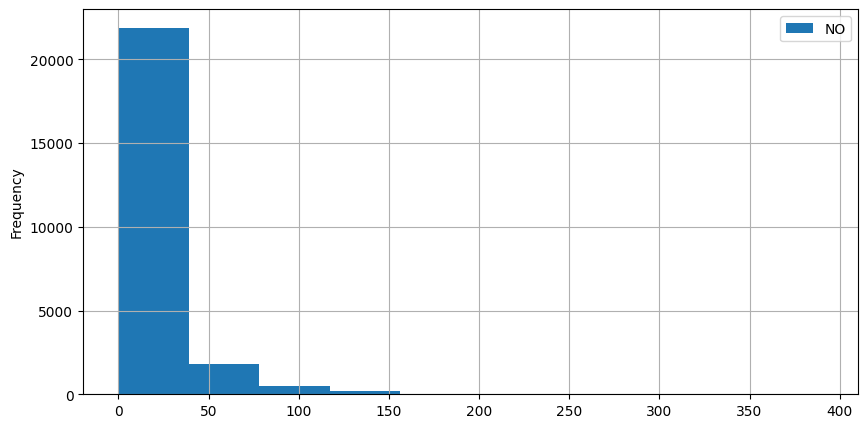

In [30]:
elements = [
    "Xylene",
    "PM10",
    "NH3",
    "Toluene",
    "Benzene",
    "NOx",
    "O3",
    "PM2.5",
    "SO2",
    "CO",
    "NO2",
    "NO"
]

for i in elements:
    df[i].plot(kind="hist",figsize=(10,5))
    plt.grid(True)
    plt.legend()
    plt.show()

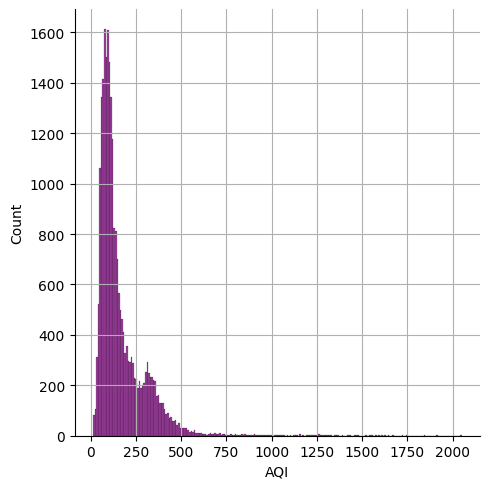

In [32]:
sns.displot(df,x="AQI", color="purple")
plt.grid(True)
plt.show()

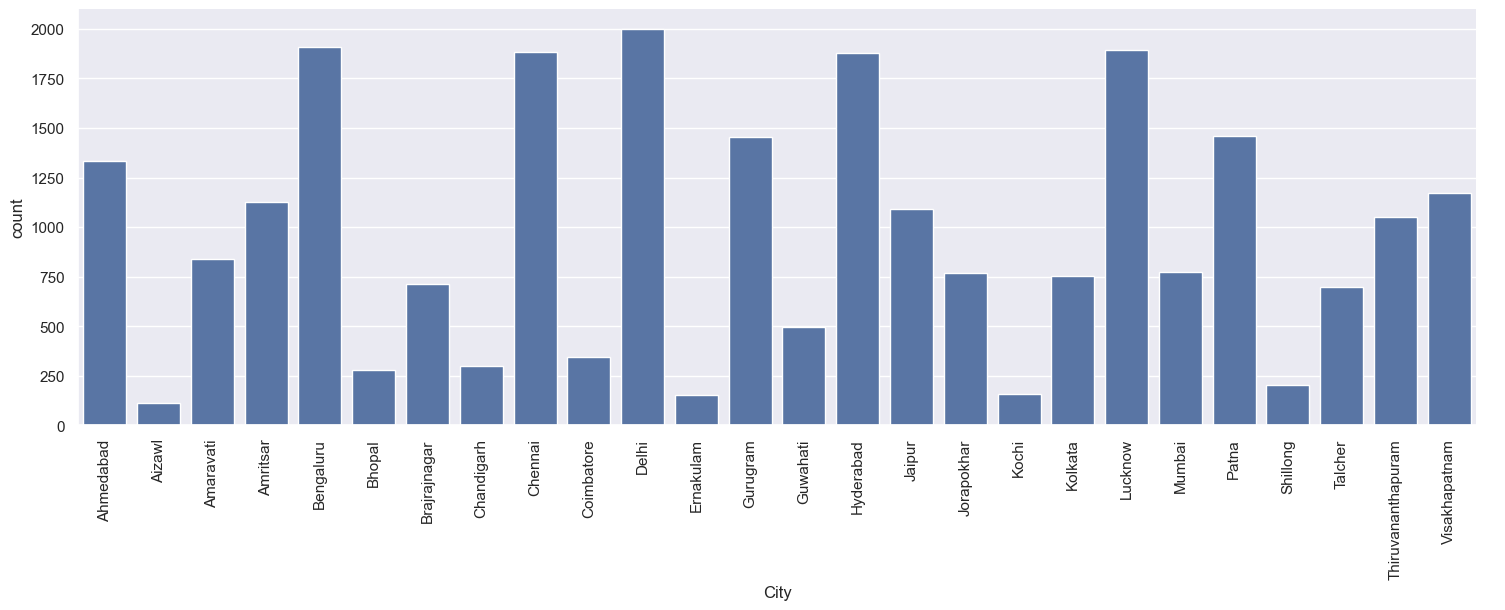

In [36]:
sns.set(style="darkgrid")
graph=sns.catplot(x="City",kind="count",data=df,height=5,aspect=3)
graph.set_xticklabels(rotation=90)

In [37]:
df.describe().loc["mean"]

PM2.5       67.476613
PM10       118.454435
NO          17.622421
NO2         28.978391
NOx         32.289012
NH3         23.848366
CO           2.345267
SO2         14.362933
O3          34.912885
Benzene      3.458668
Toluene      9.525714
Xylene       3.588683
AQI        166.463581
Name: mean, dtype: float64

In [38]:
df.describe().loc["std"]

PM2.5       63.075398
PM10        89.487976
NO          22.421138
NO2         24.627054
NOx         30.712855
NH3         25.875981
CO           7.075208
SO2         17.428693
O3          21.724525
Benzene     16.036020
Toluene     20.881085
Xylene       6.754324
AQI        140.696585
Name: std, dtype: float64

In [41]:
df = df.replace({
    "PM2.5": {np.nan: 67.4766130},
    "PM10": {np.nan: 118.454435},
    "NO": {np.nan: 17.622421},
    "NO2": {np.nan: 28.978391},
    "NOx": {np.nan: 32.289012},
    "NH3": {np.nan: 23.848366},
    "CO": {np.nan: 2.345267},
    "SO2": {np.nan: 14.362933},
    "O3": {np.nan: 34.912885},
    "Benzene": {np.nan: 3.458668},
    "Toluene": {np.nan: 9.525714},
    "Xylene": {np.nan: 3.588683},
    "AQI": {np.nan: 166.463581}
})


In [42]:
df.isnull().sum()

City       0
PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

<Axes: >

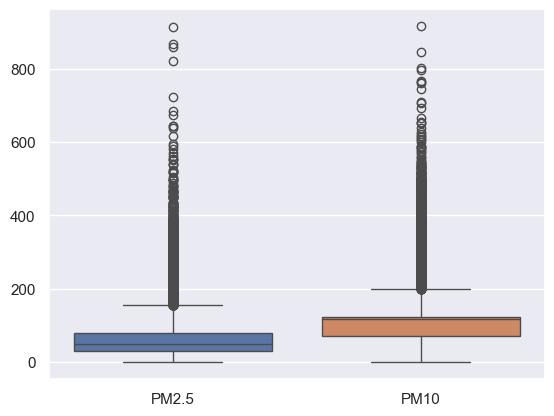

In [44]:
sns.boxplot(data=df[['PM2.5','PM10']])

<Axes: >

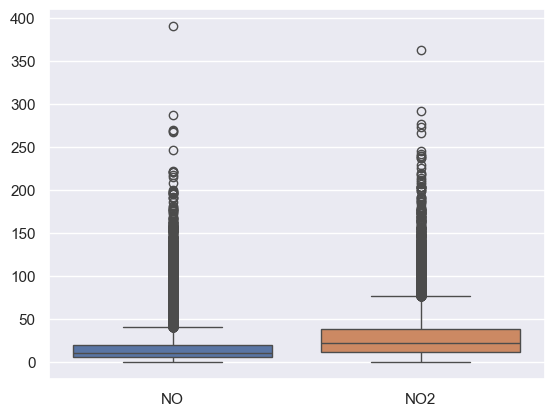

In [45]:
sns.boxplot(data=df[['NO','NO2']])

<Axes: >

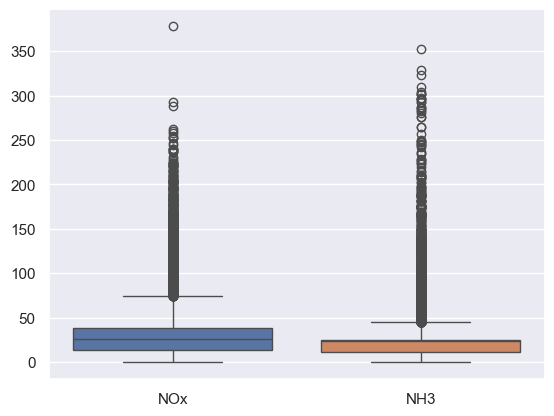

In [47]:
sns.boxplot(data=df[['NOx','NH3']])

<Axes: >

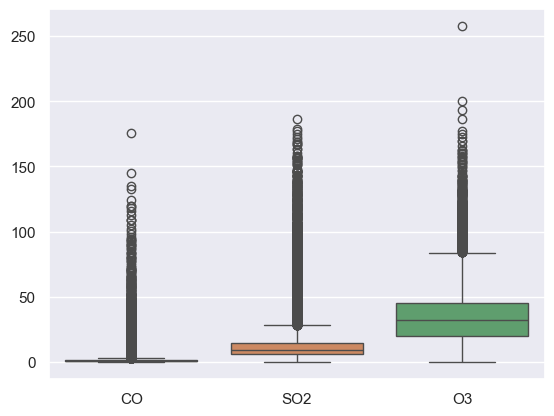

In [51]:
sns.boxplot(data=df[['CO','SO2','O3']])

<Axes: >

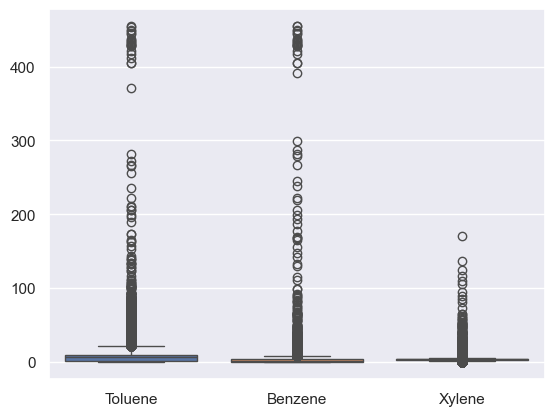

In [52]:
sns.boxplot(data=df[['Toluene','Benzene','Xylene']])

In [53]:
def replace_outliers_with_quartiles(df):
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = df[column].apply(
            lambda x: Q1 if x < lower_bound else (Q3 if x > upper_bound else x)
        )
    return df

df = replace_outliers_with_quartiles(df)


## boxplot code rewrite